<a href="https://colab.research.google.com/github/PundirShivam/Portfolio/blob/master/Index%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
!pip install nsepy

In [0]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import scipy.stats as scs
import statsmodels.api as sm
import math
import seaborn as sns
mlp.rcParams['font.family'] ='serif'

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2017-07-10,9719.30,9782.15,9646.45,9771.05,40142973,1.920780e+10
2017-07-11,9797.45,9830.05,9778.85,9786.05,185322358,9.908410e+10
2017-07-12,9807.30,9824.95,9787.70,9816.10,150045594,7.966440e+10
2017-07-13,9855.80,9897.25,9853.45,9891.70,186866752,1.024456e+11
2017-07-14,9913.30,9913.30,9845.45,9886.35,164456602,9.187710e+10


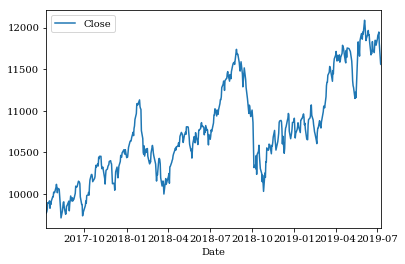

In [0]:
# An example of data set we will be using
from nsepy import get_history
from datetime import date
data = get_history(symbol="NIFTY 50", start=date(2017,7,9), end=date(2019,7,9),index=True)
#data = get_history(symbol="SBIN", start=date(2017,7,9), end=date(2019,7,9))
data[['Close']].plot()
data.head(5)

In [0]:
# Example of data frame which will be
data.head()
# we will rely on data frame of this type
# note that Close will not be ADJUSTED in case of stock price
# if direclty extracted from NSE website
# So , better use this for Indexes if no other source is available

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2017-07-10,9719.30,9782.15,9646.45,9771.05,40142973,1.920780e+10
2017-07-11,9797.45,9830.05,9778.85,9786.05,185322358,9.908410e+10
2017-07-12,9807.30,9824.95,9787.70,9816.10,150045594,7.966440e+10
2017-07-13,9855.80,9897.25,9853.45,9891.70,186866752,1.024456e+11
2017-07-14,9913.30,9913.30,9845.45,9886.35,164456602,9.187710e+10


In [0]:
# Helper functions

def dN(x,mu,sigma):
  '''
  Probability density function of a normal random variable x
  
  Params:
  mu : Expected value
  sigma: standard deviation 
  
  Returns:
  pdf 
  '''
  z=(x-mu)/sigma
  pdf = (1/(math.sqrt(2*math.pi*sigma**2)))*math.exp(-.5*z**2)
  return pdf


In [0]:
# log_return and variance

def return_variance(data):
  '''
  Parameter:
  data is a data frame having "Close" column
  and index with name as 'Date'
  
  '''
  data['log_returns'] = np.log(data['Close']/data['Close'].shift(1)) #log return
  data['real_var'] = 252*np.cumsum(data['log_returns']**2)/np.arange(len(data)) 
  # annualized realized variance is calculated on continous basis
  data['real_vol'] = np.sqrt(data['real_var'])
  # realized volitality i.e. standardised
  return data.dropna()

In [0]:
data = return_variance(data)

In [0]:
# generate  benchmark series

def benchmark_simulate(So=1000,T=10,r=0.05,sigma=0.2):
  '''
  Paramters :
  So = 1000 # index stock price
  T = 10 # no of years simulating   
  r = 0.05 # short term interest rate comtinously compunded
  sigma = 0..2 # std deviation of daily returns. i.e. volitality 
  '''
  T = T*252 # assuming no of Trading (Business) days in an year to be 252
  date_rang = pd.date_range(start='1-1-2009',periods=T,freq='B')
  # we have now created time stamp for each business day 
  # for period of 10 years 
  S= np.zeros(T) # initializing stock price at each business day as zero
  S[0] = So # first day price would be an input in timeseries
  dt = 1 # default delta in time
  for t in range(1,T): # i.e. for each B. Day in time history
    dt = (date_rang[t] - date_rang[t-1]).days/252
    S[t] = S[t-1] * math.exp((r-.5*sigma**2)*dt+sigma*math.sqrt(dt)*np.random.normal(0,1))
    df_S = pd.DataFrame(S,index=date_rang,columns=['Close'])
    df_S.index.name ='Date'
  return df_S

In [0]:
# printing statistics

def return_statistics(data):
  """
  Paramters:
  data is a data frame
  with columns named as log_returns
  real_var:realized variance
  real_vol: realized volatiity
  """
  data = data.dropna()
  # dropping rows with nan
  print("RETRUN SAMPLE STATISTICS")
  print("-----------------------------------------------------")
  print('Mean of Daily Log Returns {0:.6f}'.format(data['log_returns'].mean()))
  print('Std of Daily Log Returns {0:.6f}'.format(data['log_returns'].std()))
  print('Mean of Annua. Log Returns {0:.6f}'.format(252*data['log_returns'].mean()))
  print('Std of Annua. Log Returns {0:.6f}'.format(math.sqrt(252)*data['log_returns'].std()))
  print("-----------------------------------------------------")
  print('Skew of Sample Log Returns {0:.6f}'.format(scs.skew(data['log_returns'])))
  print('Skew Normal Test p-value {0:.6f}'.format(scs.skewtest(data['log_returns'])[1]))
  print("-----------------------------------------------------")
  print('Kurtosis of Sample Log Returns {0:.6f}'.format(scs.kurtosis(data['log_returns'])))
  print('Kurtosis Normal Test p-value {0:.6f}'.format(scs.kurtosistest(data['log_returns'])[1]))
  print("-----------------------------------------------------")
  print('Normal Test i.e. to check If time series in normal p-value {0:.6f}'.format(scs.normaltest(data['log_returns'])[1]))
  print("-----------------------------------------------------")
  print('Realized Volatility {0:.6f}'.format(data['real_vol'].iloc[-1]))
  print('Realized Variance {0:.6f}'.format(data['real_var'].iloc[-1]))

In [0]:
# Plotting price history and daily return
def price_plot(data):
  f=plt.figure(figsize=(9,6))
  f.suptitle('Price and Log-returns plot')
  plt.subplot(211)
  data['Close'].plot()
  plt.ylabel('daily price')
  plt.grid(True)
  plt.xlabel('')
  plt.axis('tight')

  plt.subplot(212)
  data['log_returns'].plot()
  plt.ylabel('daily log returns')
  plt.grid(True)
  plt.axis('tight')

In [0]:
def histogram_plot(data):
  data.dropna(inplace=True)
  f=plt.figure(figsize=(9,5))
  f.suptitle('Histogram Plot')
  sns.distplot(data['log_returns'])
  plt.xlabel('log returns')
  plt.ylabel('frequency/probability')
  plt.grid(True)      

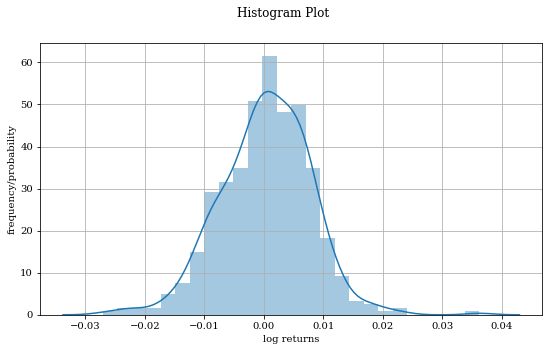

In [0]:
histogram_plot(data)

In [0]:
# Q-Q plot of annualized daily log returns 

def qq_plot(data):
  plt.figure(figsize=(9,5))
  sm.qqplot(data['log_returns'],line='s')
  plt.grid(True)
  plt.xlabel('theroretical quantiles')
  plt.ylabel('sample quantiles')
  plt.title('Q-Q Plot')

<Figure size 648x360 with 0 Axes>

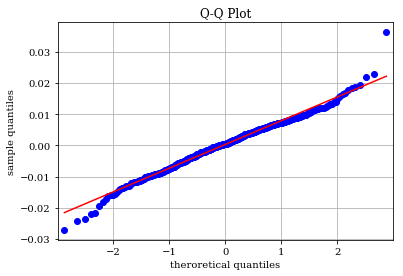

In [0]:
qq_plot(data)

In [0]:
# plotting realized volitality
def real_vol_plot(data):
  
  f=plt.figure(figsize=(11,8))
  f.suptitle('Realized volitality plot')
  data['real_vol'].plot()
  plt.ylabel('realized volatility')
  plt.grid(True)

In [0]:
# plot for defining rolling mean, volatility  and correlation (i.e. moving average of 1 yr = 252 days)

def rolling_statistics_plot(data,moving_window=252):
  """
  The function plots rolling statistics( moving averages)
  i.e mean log_returns , mean std of log_returns
  i.e. correlation of mean of  log_returns, and std of log_returns
  
  Parameters:
  Default moving window is one year i.e. 252 days
  """
  
  #f=plt.figure(figsize=(11,15))
  
  
  f=plt.figure(figsize=(9,6))

  
  f.suptitle("Rolling Statistics of Sample Series ")
  plt.subplot(311)
  mr = data['log_returns'].rolling(moving_window).mean()*252
  # *252 is done to annualzied it. not dependent on moving average window
  mr.plot()
  plt.grid(True)
  plt.xlabel('')
  plt.ylabel('returns ({}d)'.format(moving_window))
  plt.axhline(mr.mean(),color='r',ls='dashed',lw=1.5)
  
  plt.subplot(312)
  vo = data['log_returns'].rolling(moving_window).std()*math.sqrt(252)
  #vo = data['Volume'].shift(-20).rolling(20).mean()
  # *252 is done to annualzied it. not dependent on moving average window
  vo.plot()
  #plt.plot(data['Volume'])
  plt.grid(True)
  plt.xlabel('')
  plt.ylabel('volatility ({}d)'.format(moving_window))
  #plt.ylabel('Volume ({}d)'.format(20))
  plt.axhline(vo.mean(),color='r',ls='dashed',lw=1.5)
  
  plt.subplot(313)
  co = mr.rolling(moving_window).corr(vo)
  # *252 is done to annualzied it. not dependent on moving average window
  co.plot()
  plt.grid(True)
  plt.xlabel('')
  plt.ylabel('correlation ({}d)'.format(moving_window))
  plt.axhline(co.mean(),color='r',ls='dashed',lw=1.5)
  plt.axis([data.index.min() ,data.index.max(), -1 ,1])
  

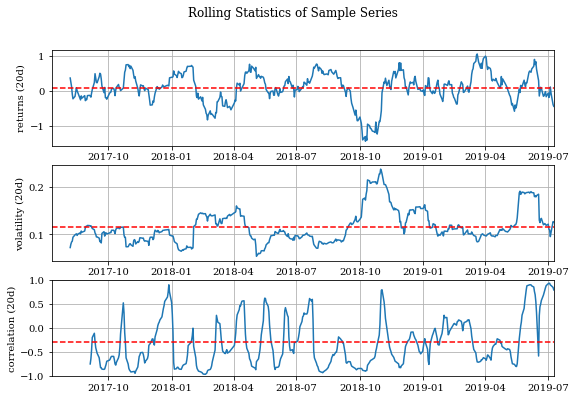

In [0]:
rolling_statistics_plot(data)

In [0]:
def describe_plots(data):
  """
  The function describes and plots 
  all the above in  one go
  takes data frame data
  """
  data = return_variance(data)
  return_statistics(data)
  price_plot(data)
  histogram_plot(data)
  qq_plot(data)
  real_vol_plot(data)
  
  rolling_statistics_plot(data,moving_window=20)
  

RETRUN SAMPLE STATISTICS
-----------------------------------------------------
Mean of Daily Log Returns 0.000337
Std of Daily Log Returns 0.007609
Mean of Annua. Log Returns 0.084974
Std of Annua. Log Returns 0.120794
-----------------------------------------------------
Skew of Sample Log Returns -0.088189
Skew Normal Test p-value 0.418151
-----------------------------------------------------
Kurtosis of Sample Log Returns 1.226747
Kurtosis Normal Test p-value 0.000127
-----------------------------------------------------
Normal Test i.e. to check If time series in normal p-value 0.000467
-----------------------------------------------------
Realized Volatility 0.120790
Realized Variance 0.014590


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


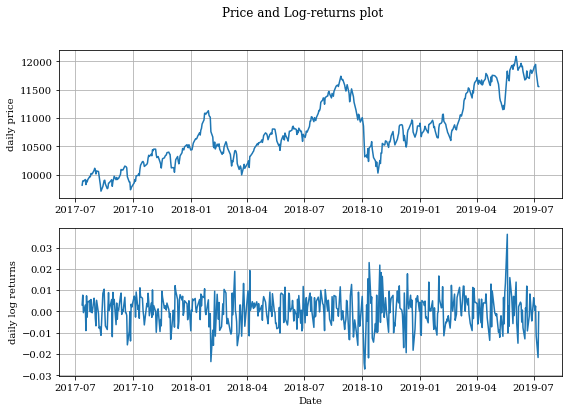

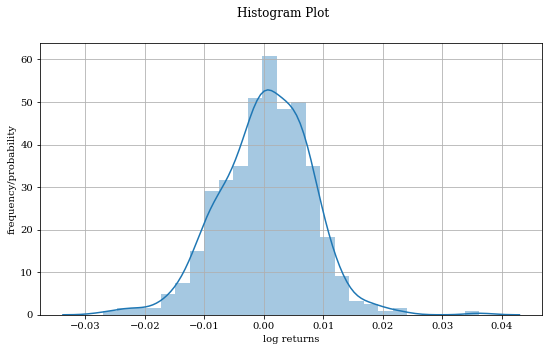

<Figure size 648x360 with 0 Axes>

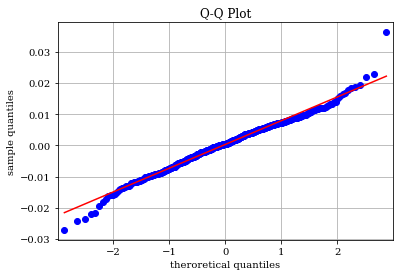

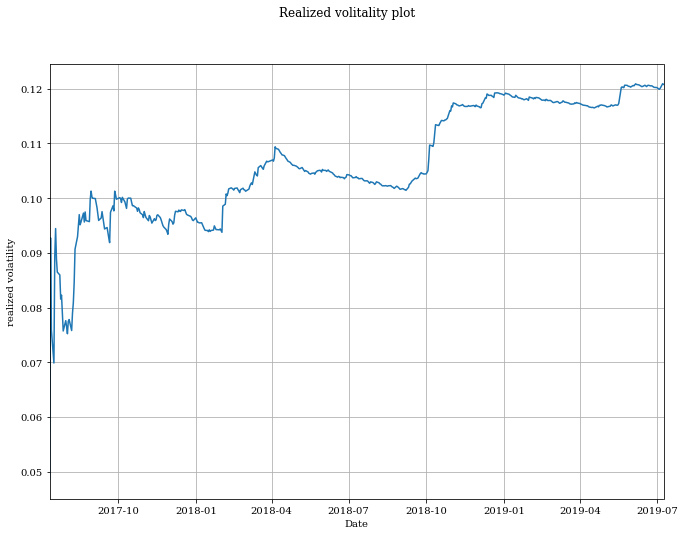

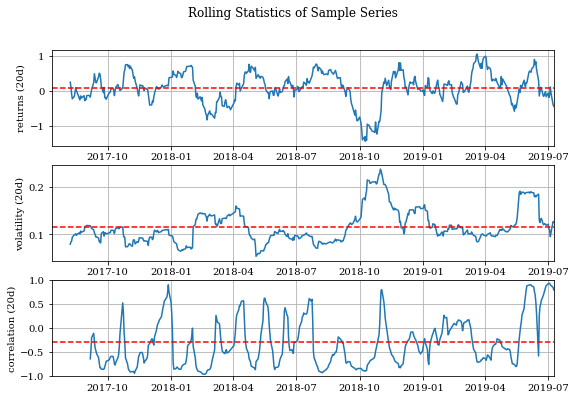

In [0]:
describe_plots(data)

In [0]:
# comparing it to a randon data series

data_random = benchmark_simulate(So=4000, T=10, r=0.1, sigma=0.2)

In [0]:
data_random.head(5)

,Close
Date,
2009-01-01,4000.000000
2009-01-02,3968.760552
2009-01-05,3987.490708
2009-01-06,3935.336520
2009-01-07,3946.145217


RETRUN SAMPLE STATISTICS
-----------------------------------------------------
Mean of Daily Log Returns 0.000479
Std of Daily Log Returns 0.015042
Mean of Annua. Log Returns 0.120765
Std of Annua. Log Returns 0.238781
-----------------------------------------------------
Skew of Sample Log Returns -0.036519
Skew Normal Test p-value 0.453115
-----------------------------------------------------
Kurtosis of Sample Log Returns 0.830329
Kurtosis Normal Test p-value 0.000000
-----------------------------------------------------
Normal Test i.e. to check If time series in normal p-value 0.000000
-----------------------------------------------------
Realized Volatility 0.238855
Realized Variance 0.057052


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


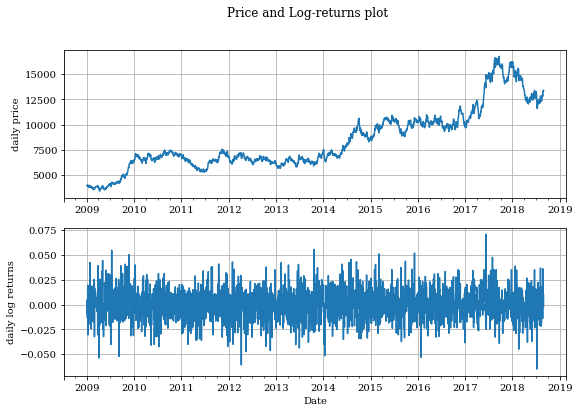

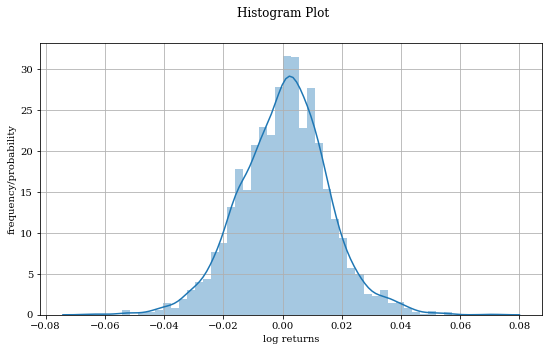

<Figure size 648x360 with 0 Axes>

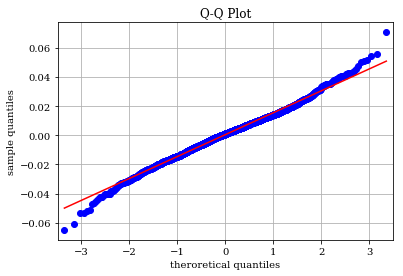

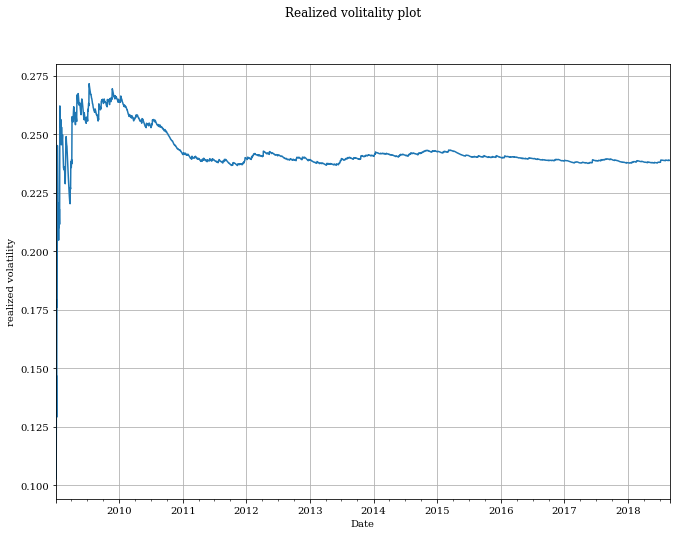

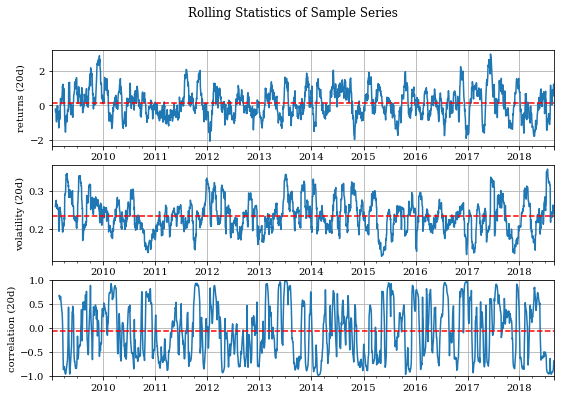

In [0]:
describe_plots(data_random)

In [0]:
## Clearly Stylized Facts
"""
Our model need to account for following points 
during simulation:

1. autocorrelated stochastic volatility
2. mean reversion of volatility
3. leverage effect, i.e. negative correlation b/w returns and volatility
4. fat tails of and jumps in the index returns
"""

'\nOur model need to account for following points \nduring simulation:\n\n1. autocorrelated stochastic volatility\n2. mean reversion of volatility\n3. leverage effect, i.e. negative correlation b/w returns and volatility\n4. fat tails of and jumps in the index returns\n'

In [0]:
"""
Stylized facts about volatiloty surface for stock indices:

1. smiles: option implied volatilities exhibit a smile form, i.e. for calls the OTM implied
volatilities are higher than the ATM ones;sometimes they rise again for ITM options; this
is a phenomenon present in the financial markets mainly since the market crash of 1987

2. term structure:smiles are more pronounced for short-term options than for longer-term
options; a phenomenon sometimes called volatility term structure

"""

'\nStylized facts about volatiloty surface for stock indices:\n\n1. smiles: option implied volatilities exhibit a smile form, i.e. for calls the OTM implied\nvolatilities are higher than the ATM ones;sometimes they rise again for ITM options; this\nis a phenomenon present in the financial markets mainly since the market crash of 1987\n\n2. term structure:smiles are more pronounced for short-term options than for longer-term\noptions; a phenomenon sometimes called volatility term structure\n\n'